 **From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.**

In [42]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D


**Now we will assign the dataset to a dataframe named "iris" using read_csv method from pandas module and output the first five rows using head() method**

In [35]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
X=iris.data
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
x=iris_df.iloc[:,:-1].values
y=iris_df.iloc[:,-1].values
from sklearn.preprocessing import LabelEncoder
ly=LabelEncoder()
y=ly.fit_transform(y)

**Data Visualization**

Plotting an each pair scatter plot to get a understanding of how variables are correlated with each other.

In [33]:
fig_scatter=px.scatter_matrix(iris_df,dimensions=['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)'])
fig_scatter.update_layout(
    title="Iris Data Scatter Plots",
    width=900,
    height=700,
)
fig_scatter.show()

**How do you find the optimum number of clusters for K Means? How does one determine the value of K?**

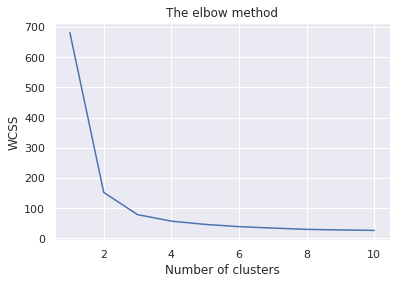

In [43]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**'.

**3D visualization of Data**

Text(0.5, 0.92, 'K Means')

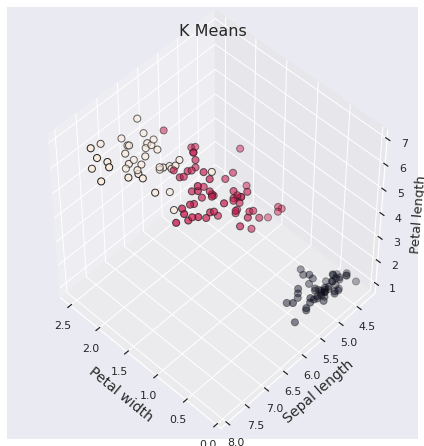

In [44]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)
labels = kmeans.labels_

fig = plt.figure(1, figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],c=labels.astype(np.float),edgecolor="k", s=50)
ax.set_xlabel("Petal width", fontsize=14)
ax.set_ylabel("Sepal length", fontsize=14)
ax.set_zlabel("Petal length", fontsize=13)
plt.title("K Means", fontsize=16)

**Applying KMeans to the dataset i.e final prediction and visualization**

In [40]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

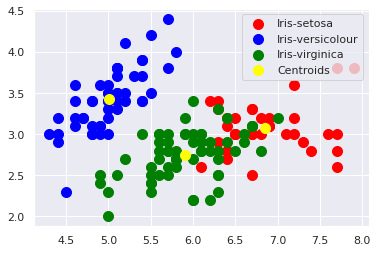

In [41]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()